In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ast import literal_eval
from glob import glob 

In [2]:
paths = {
    'Lgbm' :"lgbm/lgbm_vanilla",
    'Catboost' :"catboost/catboost_vanilla",
    "Ours_kfold" :"ours/ours_Kfold",
     "Ours_Vanilla" :"ours/ours_CartVanilla",
    "Sklearn_Mean_Imputing" : "sklearn/sklearn_mean_imputing",
    'Xgboost_Mean_Imputing': "xgboost/xgboost_mean_imputing",
    
    
}

In [3]:
features = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
all_cols = [ 'gain', 'permutation_train', 'permutation_test','shap_train', 'shap_test']
our_cols = [ 'gain', 'permutation_train', 'permutation_test']
temp_paths = glob("lgbm/lgbm_vanilla*")

In [4]:
def plot_boxplot(paths, algorithm, results):
    temp_results = []
    cols = our_cols if algorithm.startswith('Ours') else all_cols
    for path in paths:
        df = pd.read_csv(path, converters = {col: literal_eval for col in cols})
        for fi in all_cols:
            temp_df = pd.Series(df.loc[0,fi]).to_frame() 
            temp_df = temp_df.reset_index()
            temp_df.columns = ['feature', 'value']
            temp_df['fi_type'] = fi
            temp_df['algo'] = algorithm
            temp_results.append(temp_df)

    plt.figure(figsize=(20,8))
    temp_results = pd.concat(temp_results)
    temp_results = temp_results[temp_results['feature'] != 0]
    results.append(temp_results)
    sns.boxplot(data = temp_results, x = 'feature', y = 'value', hue = 'fi_type').set_title(algorithm)
    plt.show()

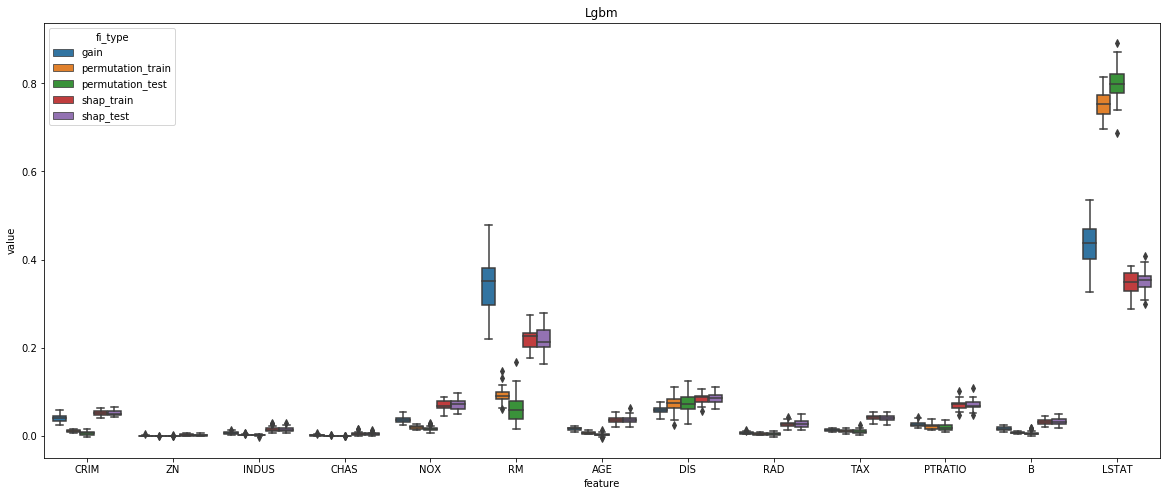

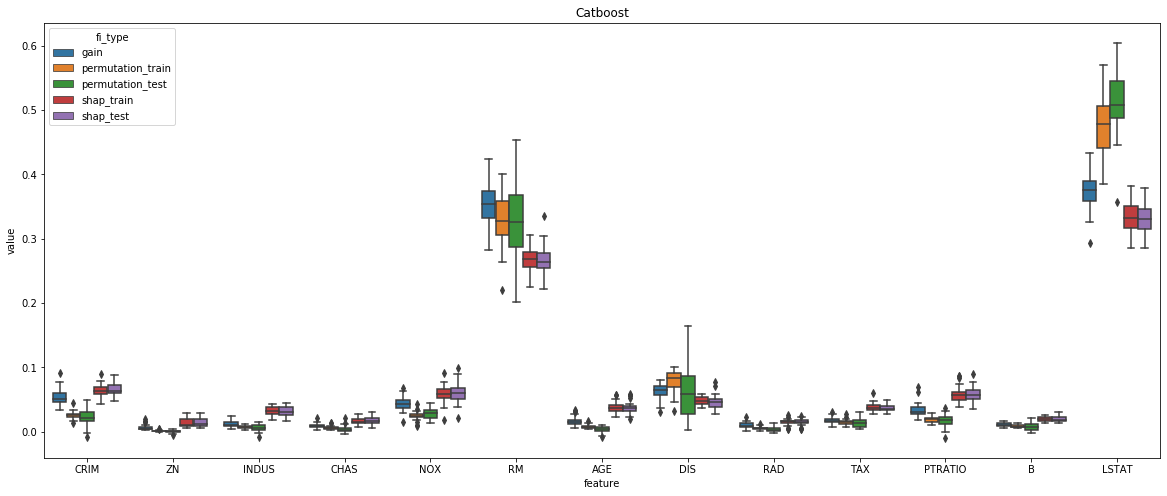

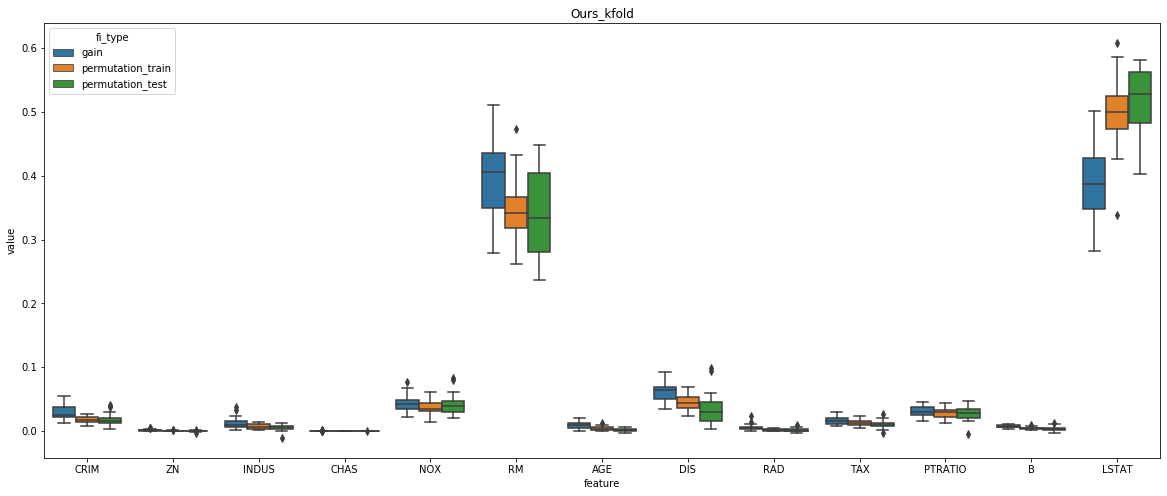

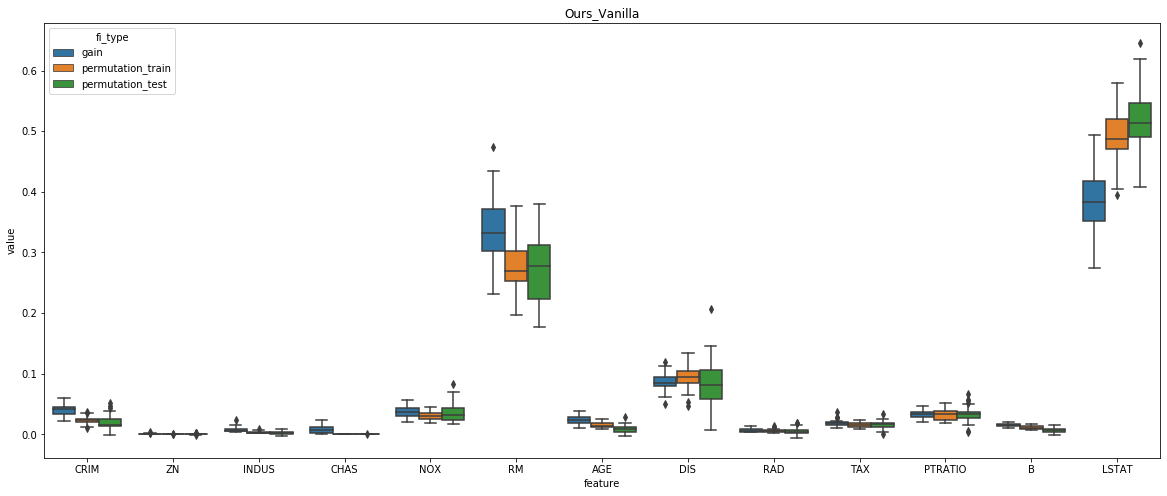

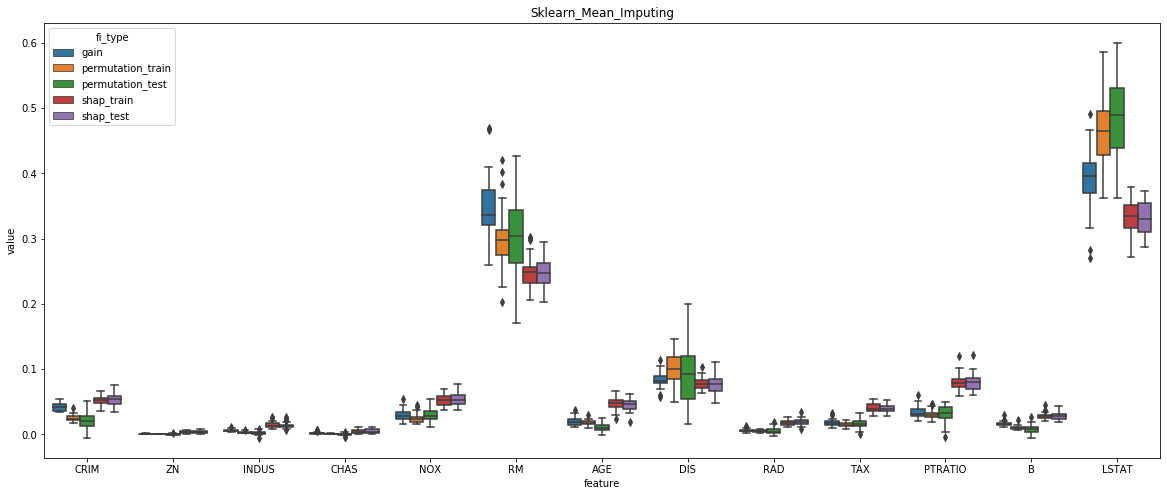

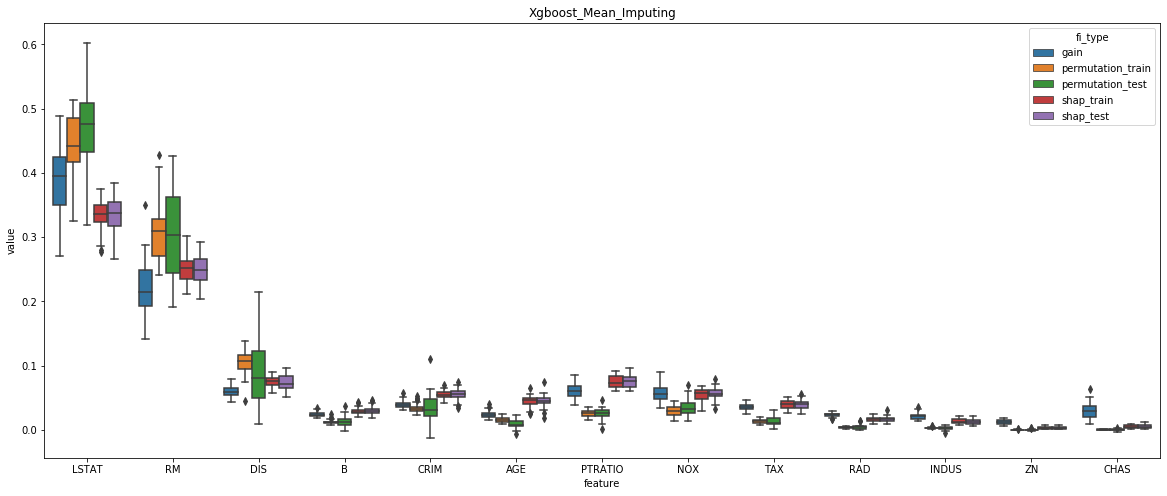

In [5]:
results = []
for algo, path in paths.items():
    plot_boxplot(glob(path +"*"), algo, results)

In [6]:
results = pd.concat(results)

In [7]:
df = results.groupby(['fi_type', 'algo','feature']).value.apply(np.std).to_frame().reset_index()
for fi in df.fi_type.unique():
    print(fi)
    display(df[df.fi_type == fi].pivot(index = 'algo', columns = 'feature',values = 'value' ).style.background_gradient() )
# df['value'].apply(np.std)

gain


feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
algo,,,,,,,,,,,,,
Catboost,0.007025,0.003003,0.003634,0.013186,0.012097,0.004849,0.031223,0.011047,0.010822,0.004686,0.034526,0.005097,0.004427
Lgbm,0.003143,0.004115,0.001420,0.008038,0.008955,0.002883,0.054956,0.007527,0.005931,0.002335,0.059399,0.002918,0.000578
Ours_Vanilla,0.007361,0.002455,0.005564,0.009271,0.015657,0.004482,0.053225,0.009610,0.006360,0.002985,0.054203,0.005278,0.000730
Ours_kfold,0.005436,0.002407,0.000334,0.010731,0.013660,0.008430,0.054772,0.011756,0.008302,0.004766,0.060176,0.006897,0.001338
Sklearn_Mean_Imputing,0.006658,0.003963,0.001755,0.006594,0.011357,0.002113,0.048160,0.008233,0.008702,0.002418,0.053205,0.004696,0.000500
Xgboost_Mean_Imputing,0.005651,0.003636,0.012649,0.006278,0.008540,0.004956,0.053354,0.013166,0.011275,0.003367,0.045012,0.005050,0.003730


permutation_test


feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
algo,,,,,,,,,,,,,
Catboost,0.004989,0.005360,0.005030,0.013854,0.040518,0.004874,0.047015,0.008418,0.009611,0.003666,0.062106,0.006779,0.002125
Lgbm,0.003431,0.004533,0.000273,0.004811,0.022868,0.001418,0.042099,0.005194,0.007228,0.003650,0.033094,0.004899,0.000213
Ours_Vanilla,0.006241,0.004557,0.000000,0.012747,0.040568,0.002632,0.050871,0.016322,0.013842,0.006001,0.055327,0.007396,0.000683
Ours_kfold,0.002771,0.003745,0.000000,0.009840,0.022708,0.004281,0.053158,0.015149,0.010431,0.002587,0.063975,0.005949,0.000948
Sklearn_Mean_Imputing,0.006293,0.006449,0.001471,0.013662,0.045888,0.002775,0.057791,0.010500,0.012661,0.005380,0.062218,0.007790,0.000902
Xgboost_Mean_Imputing,0.006642,0.007972,0.001394,0.022704,0.052106,0.002495,0.066594,0.012757,0.008385,0.003340,0.069220,0.007446,0.001187


permutation_train


feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
algo,,,,,,,,,,,,,
Catboost,0.002899,0.002547,0.002644,0.005941,0.016902,0.002557,0.044799,0.006540,0.004828,0.002249,0.042763,0.004099,0.001076
Lgbm,0.002209,0.002051,0.000280,0.002166,0.019870,0.001481,0.029285,0.004144,0.006355,0.001825,0.018012,0.002958,0.000065
Ours_Vanilla,0.004597,0.002630,0.000000,0.006327,0.019699,0.001466,0.046069,0.007621,0.008735,0.002721,0.043769,0.004085,0.000290
Ours_kfold,0.003071,0.001815,0.000000,0.005447,0.012861,0.003788,0.054110,0.009679,0.008296,0.001371,0.048546,0.004451,0.000579
Sklearn_Mean_Imputing,0.004146,0.002877,0.000429,0.005200,0.022780,0.001330,0.052792,0.007176,0.006993,0.001774,0.045362,0.003953,0.000294
Xgboost_Mean_Imputing,0.003681,0.003475,0.000545,0.007091,0.019726,0.001129,0.051677,0.008375,0.005417,0.001224,0.044667,0.003555,0.000336


shap_test


feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
algo,,,,,,,,,,,,,
Catboost,0.009007,0.004860,0.005980,0.010481,0.010611,0.008355,0.022756,0.015795,0.011369,0.004644,0.022592,0.005479,0.007519
Lgbm,0.009224,0.007771,0.003027,0.006408,0.012365,0.004843,0.024074,0.012235,0.011377,0.008158,0.025129,0.006866,0.001639
Sklearn_Mean_Imputing,0.009534,0.006153,0.003167,0.009499,0.014104,0.004414,0.027014,0.009400,0.012528,0.005351,0.024249,0.006015,0.001924
Xgboost_Mean_Imputing,0.010067,0.006105,0.002626,0.008725,0.011346,0.004250,0.028426,0.010246,0.010016,0.004225,0.023035,0.006703,0.001911


shap_train


feature,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
algo,,,,,,,,,,,,,
Catboost,0.008626,0.003453,0.004703,0.009884,0.006237,0.007458,0.022408,0.014053,0.012090,0.004646,0.019064,0.006889,0.007053
Lgbm,0.007990,0.006442,0.003708,0.005963,0.010088,0.005365,0.024365,0.010901,0.010670,0.006913,0.022725,0.006039,0.001807
Sklearn_Mean_Imputing,0.009290,0.004881,0.002772,0.006428,0.008841,0.004391,0.025481,0.008981,0.011741,0.004096,0.022926,0.006489,0.001694
Xgboost_Mean_Imputing,0.008629,0.005133,0.002330,0.006354,0.008563,0.003988,0.024486,0.009322,0.009044,0.004189,0.021907,0.006474,0.001845


In [8]:
rmse_dict = {}
for algo, path in paths.items():
    temp_results = []
    for path in glob(path +"*"):
        df = pd.read_csv(path)
        temp_results.append(df.loc[0, 'rmse'])
    rmse_dict[algo]  = temp_results
        

In [9]:
for k, v in rmse_dict.items():
    print(k, np.round(np.mean(v), 3), np.round(np.std(v), 3))

Lgbm 3.675 0.663
Catboost 3.534 0.616
Ours_kfold 3.687 0.658
Ours_Vanilla 3.344 0.638
Sklearn_Mean_Imputing 3.196 0.556
Xgboost_Mean_Imputing 3.239 0.488


In [10]:
ntrees_dict = {}
for algo, path in paths.items():
    temp_results = []
    for path in glob(path +"*"):
        df = pd.read_csv(path)
        temp_results.append(df.loc[0, 'ntrees'])
    ntrees_dict[algo]  = temp_results
for k, v in ntrees_dict.items():
    print(k, np.round(np.mean(v), 3), np.round(np.std(v), 3))

Lgbm 100.0 0.0
Catboost 100.0 0.0
Ours_kfold 33.0 3.688
Ours_Vanilla 100.0 0.0
Sklearn_Mean_Imputing 100.0 0.0
Xgboost_Mean_Imputing 100.0 0.0


In [11]:
nleaves_dict = {}
for algo, path in paths.items():
    temp_results = []
    for path in glob(path +"*"):
        df = pd.read_csv(path)
        temp_results.append(df.loc[0, 'nleaves'])
    nleaves_dict[algo]  = temp_results
for k, v in nleaves_dict.items():
    print(k, np.round(np.mean(v), 3), np.round(np.std(v), 3))

Lgbm 488.867 8.823
Catboost 800.0 0.0
Ours_kfold 191.9 19.253
Ours_Vanilla 614.133 14.592
Sklearn_Mean_Imputing 757.7 9.306
Xgboost_Mean_Imputing 692.0 15.403
